<a href="https://colab.research.google.com/github/tyagi-iiitv/infographics_generation/blob/master/SVG_choose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from natsort import natsorted
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
import os
import cv2
import signal
import multiprocessing
import time

In [2]:
def get_uniformity(box_center, flow):
    box_center = np.array(box_center)
    flow = np.array(flow)
    mean_dist = sum([np.linalg.norm(x[1:3]-box_center) for x in flow])/len(flow)
    return sum([abs(np.linalg.norm(x[1:3]-box_center)-mean_dist) for x in flow])

In [ ]:
def overlapping(box_dims, flow):
    box_dims = np.array(box_dims)
    flow = np.array(flow)
    for i,elem in enumerate(flow):
        if elem[1] < box_dims[0]+box_dims[2] and elem[2] < box_dims[1]+box_dims[3]:
            return 0
    return 1

In [ ]:
def margins(flow):
    flow = np.array(flow)
    mean_margin = sum([min(x[1:3]) for x in flow])/len(flow)
    return sum([abs(min(x[1:3])-mean_margin) for x in flow])

In [ ]:
uniformity_scores = []
data = np.array(plt.imread('images/train/0.jpg'))
h = data.shape[0]
w = data.shape[1]
box_center = (h/2, w/2)
for i,flow in enumerate(flows):
    uniformity_scores.append(margins(flow))
    
    

![vg1](vg1.svg)

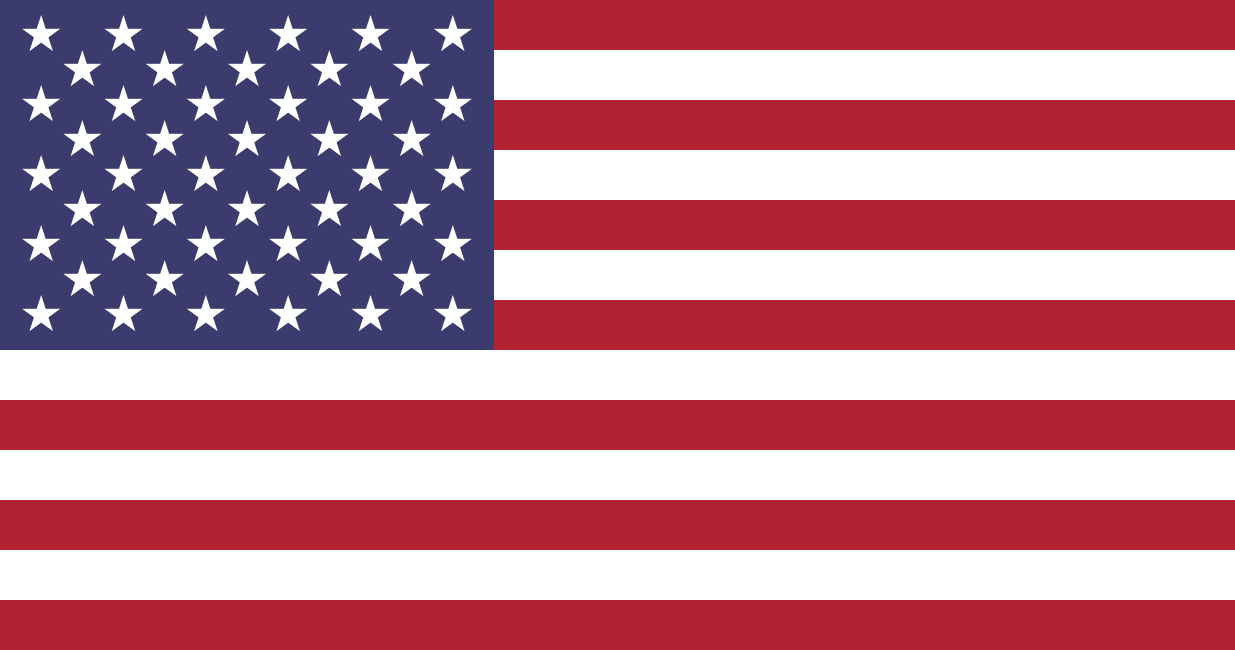

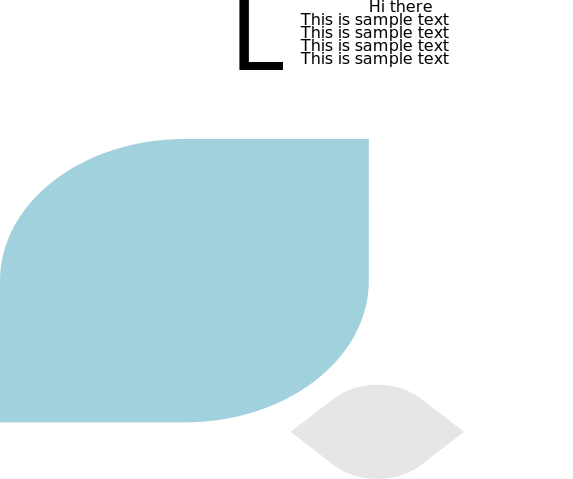

In [15]:
from IPython.display import SVG, display
display(SVG(url='http://upload.wikimedia.org/wikipedia/en/a/a4/Flag_of_the_United_States.svg'))
display(SVG(filename="vg1.svg"))

In [32]:
from xml.dom import minidom

doc = minidom.parse("vg1.svg")  # parseString also exists
print(doc)
print(doc.getElementsByTagName('text'))
x = doc.getElementsByTagName("text")
print(int(len(x)))
# for text in doc.getElementsByTagName('text'):
#   print(text)

svg_text_elements = [text.getAttribute('class') for text
                in doc.getElementsByTagName('text')]
print(svg_text_elements)

svg_image_elements = [img.getAttribute('href') for img
                in doc.getElementsByTagName('image')]
print(svg_image_elements)

doc.unlink()

[<DOM Element: text at 0x7fedb79e0898>, <DOM Element: text at 0x7fedb79e0b90>, <DOM Element: text at 0x7fedb79e0df0>, <DOM Element: text at 0x7fedb79e0f20>, <DOM Element: text at 0x7fedb79e09c8>, <DOM Element: text at 0x7fedb79e0c28>]
6
['txt-1', 'txt-1', 'txt-1', 'txt-1', '', 'label']
['sample_img.png']


In [46]:
# content - no. of labels/text/images
#assuming svg is a string
#vg = [text_no, img_no, label_no]
vg1=[3,1,1]
def number(svg_text, svg_image, vg):
  text_count = 0
  label_count = 0
  img_count = 0
  # print(svg_text)
  for t in svg_text:
    if t=="label":
      label_count += 1
    else:
      text_count = text_count + 1
  img_count = len(svg_image)

  # print(text_count, label_count, img_count)
   
  if vg[0] <= text_count and vg[1] == img_count and vg[2] == label_count:
    return 1
  else:
    return 0

number(svg_text_elements, svg_image_elements, vg1)

1